# 확률적 경사 하강법

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


<table align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/rickiepark/hg-mldl/blob/master/4-2.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />구글 코랩에서 실행하기</a>
  </td>
</table>

## 데이터 준비

In [3]:
import pandas as pd

fish = pd.read_csv('/content/drive/MyDrive/인공지능/5주차/fish_csv_data.csv')
fish

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...
154,Smelt,12.2,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,14.3,15.2,2.8728,2.0672


In [4]:
fish_input = fish[['Weight','Length','Diagonal','Height','Width']].to_numpy()
fish_target = fish['Species'].to_numpy()

In [5]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(
    fish_input, fish_target, random_state=42)

In [6]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

## SGDClassifier

In [7]:
# 사이킷런에서 확률적 경사 하강법을 제공하는 대표적인 분류용 클래스는 SGDClassifier
from sklearn.linear_model import SGDClassifier

In [9]:
sc = SGDClassifier(loss='log_loss', max_iter=10, random_state=42)
sc.fit(train_scaled, train_target)

print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.773109243697479
0.775


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_stochastic_gradient.py:738: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


In [20]:
# 확률적 경사 하강법은 점진적 학습이 가능함 SGDClassifier 객체를 다시 만들지 않고 훈련한 모델 sc를 추가
sc.partial_fit(train_scaled, train_target)

print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.8487394957983193
0.9


## 에포크와 과대/과소적합

In [21]:
# 이 예제에서 fit() 메서드는 사용하지 않고 partial_fit() 메서드만 사용
# 이 메서드만 사용하려면 훈련 세트에 있는 전체 클래스의 레이블을 patial_fit() 메서드에 전달해 주어야 함
# 이를 위해 np.nuique()함수로 train_target에 있는 7개 생선의 목록을 만듦
# 또한 에포크마다 훈련 세트와 테스트 세트에 대한 점수를 기록하기 위한 2개의 리스트를 준비

import numpy as np

sc = SGDClassifier(loss='log_loss', random_state=42)
train_score = []
test_score = []

classes = np.unique(train_target)

In [22]:
# 300번 에포크 진행
for _ in range(0, 300):
    sc.partial_fit(train_scaled, train_target, classes=classes)

    train_score.append(sc.score(train_scaled, train_target))
    test_score.append(sc.score(test_scaled, test_target))



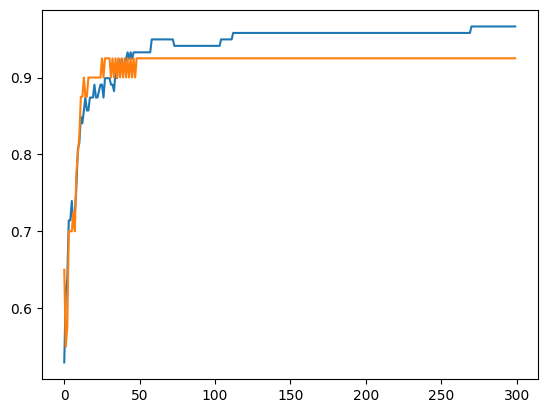

In [23]:
# 훈련 세트와 테스트 세트이 점수를 그래프로 표현
import matplotlib.pyplot as plt

plt.plot(train_score)
plt.plot(test_score)
plt.show()

In [24]:
# 100번 에포크 맞추고 모델을 훈련하고 최종적으로 훈련 세트와 테스트 세트에서 점수를 출력
# tol 매개변수를 None으로 지정하여 자동으로 멈추지 않고 100 만큼 무조건 반복
sc = SGDClassifier(loss='log_loss', max_iter=100, tol=None, random_state=42)
sc.fit(train_scaled, train_target)

print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))



0.957983193277311
0.925
